# TikTok Video Analysis


## Importing Packages and Loading the Dataset

In [1]:
# Import packages for data manipulation

import pandas as pd
import numpy as np

# Import packages for data visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for statistical analysis/hypothesis testing

from scipy import stats

In [2]:
# Loading dataset into dataframe called 'tiktok_df'.

tiktok_df = pd.read_csv("tiktok_dataset.csv")

## Data Exploration and Cleaning

In [3]:
# Displaying the first few rows of the dataframe.

tiktok_df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
# Size of the data

tiktok_df.size

232584

In [5]:
# Shape of the data

tiktok_df.shape

(19382, 12)

In [6]:
# Basic information about the data

tiktok_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [7]:
# Basic descriptive statistics

tiktok_df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [8]:
# Checking for missing values.

tiktok_df.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [9]:
# Dropping the rows with missing values.

tiktok_df = tiktok_df.dropna(axis=0)

## Data Visualization

### Video Duration (seconds)

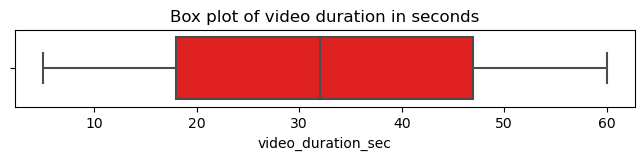

In [10]:
# Box plot to visualize distribution of 'video_duration_sec'.

plt.figure(figsize = (8,1))
sns.boxplot(x = tiktok_df['video_duration_sec'], color = 'red')
plt.title('Box plot of video duration in seconds');

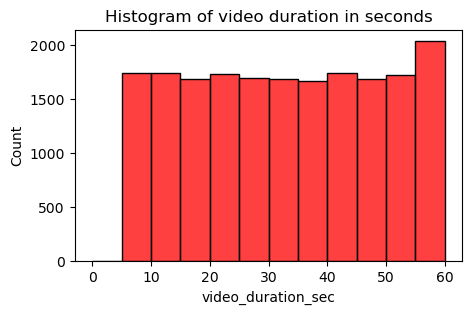

In [11]:
# Histogram of 'video_duration_sec'.

plt.figure(figsize = (5,3))
sns.histplot(tiktok_df['video_duration_sec'], bins = range(0,61,5), color = 'red')
plt.title('Histogram of video duration in seconds');

#### It can be inferred that all the videos are 5-60 seconds in length. Also, the ditribution is uniform.

### Video View Count

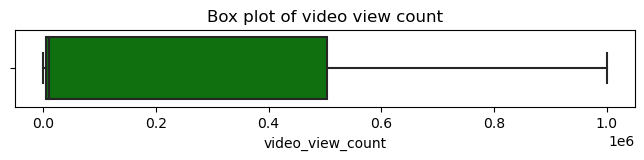

In [12]:
# Box plot to visualize distribution of 'video_view_count'.

plt.figure(figsize = (8,1))
sns.boxplot(x = tiktok_df['video_view_count'], color = 'green')
plt.title('Box plot of video view count');

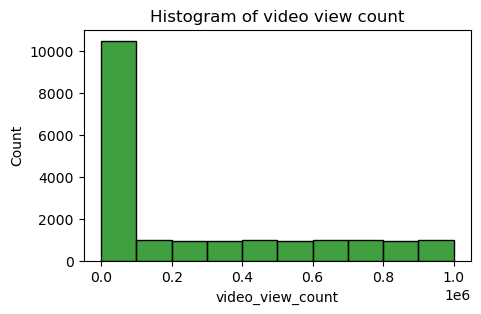

In [13]:
# Histogram of 'video_view_count'.

plt.figure(figsize = (5,3))
sns.histplot(tiktok_df['video_view_count'], bins = range(0,(10 ** 6 + 1), 10 ** 5), color = 'green')
plt.title('Histogram of video view count');

#### From the distributions, two important points can be noted:

####    (i) More than half of the videos are receiving less than 100,000 views.
####    (ii) The distribution of view counts is greater than 100,000 views is uniform.

### Video Like Count

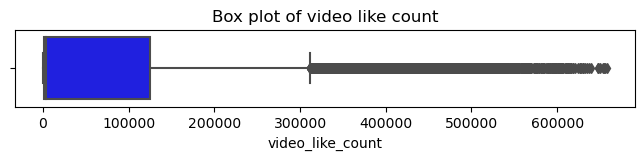

In [14]:
# Box plot to visualize distribution of `video_like_count`.

plt.figure(figsize = (8,1))
sns.boxplot(x = tiktok_df['video_like_count'], color = 'blue')
plt.title('Box plot of video like count');

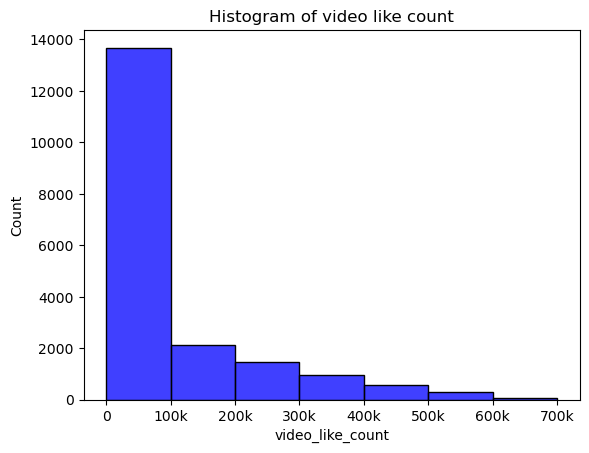

In [15]:
# Histogram of 'video_like_count'.

ax = sns.histplot(tiktok_df['video_like_count'], bins = range(0, (7 * 10 ** 5 + 1), 10 ** 5), color = 'blue')
labels = [0] + [str(i) + 'k' for i in range(100, 701, 100)]
ax.set_xticks(range(0, 7 * 10 ** 5 + 1, 10 ** 5), labels = labels)
plt.title('Histogram of video like count');

#### It is evident that there are more number of videos which have less than 100,000 likes. Also, the distribution is right-skewed.

### Video Comment Count

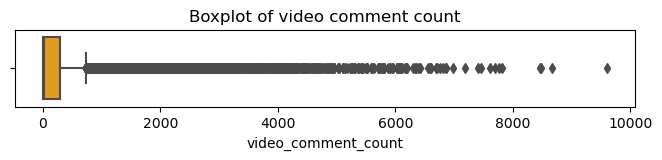

In [16]:
# Boxplot to visualize distribution of 'video_comment_count'.

plt.figure(figsize = (8,1))
sns.boxplot(x = tiktok_df['video_comment_count'], color = 'orange')
plt.title('Boxplot of video comment count');

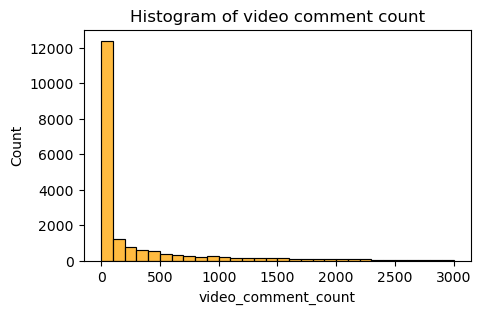

In [17]:
# Histogram of 'video comment count'.

plt.figure(figsize = (5,3))
sns.histplot(tiktok_df['video_comment_count'], bins = range(0,3001,100), color = 'orange')
plt.title('Histogram of video comment count');

#### The videos with less than 100 comments are the most in number and the distribution is highly right-skewed.

### Video Share Count

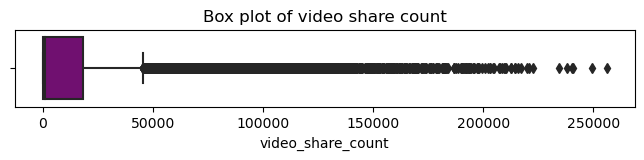

In [18]:
# Box plot to visualize distribution of 'video_share_count'.

plt.figure(figsize = (8,1))
sns.boxplot(x = tiktok_df['video_share_count'], color = 'purple')
plt.title('Box plot of video share count');

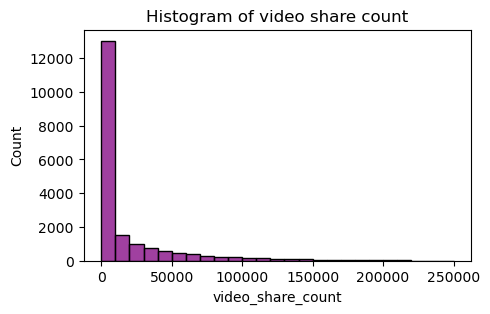

In [19]:
# Histogram of 'video_share_count'.

plt.figure(figsize = (5,3))
sns.histplot(tiktok_df['video_share_count'], bins = range(0,250001,10000), color = 'purple')
plt.title('Histogram of video share count');

#### Majority of the videos have less than 10,000 shares and the distribution is highly right-skewed.

### Video Download Count

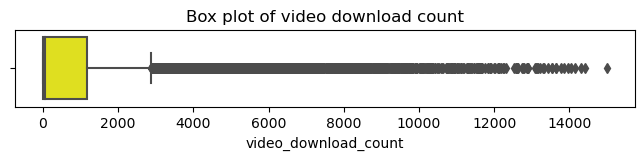

In [20]:
# Box plot to visualize distribution of 'video_download_count'.

plt.figure(figsize = (8,1))
sns.boxplot(x = tiktok_df['video_download_count'], color = 'yellow')
plt.title('Box plot of video download count');

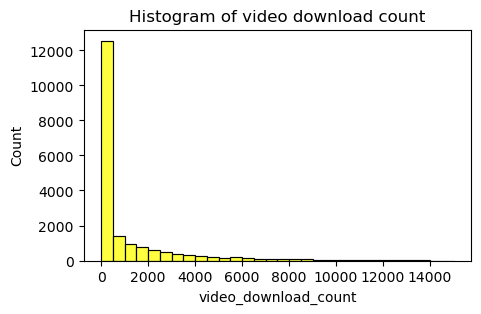

In [21]:
# Histogram of 'video download count'.

plt.figure(figsize = (5,3))
sns.histplot(tiktok_df['video_download_count'], bins = range(0,15001,500), color = 'yellow')
plt.title('Histogram of video download count');

#### Majority of the videos that were downloaded that had less than 500 downloads and the distribution is highly right skewed.

### Claim Status by Verification Status

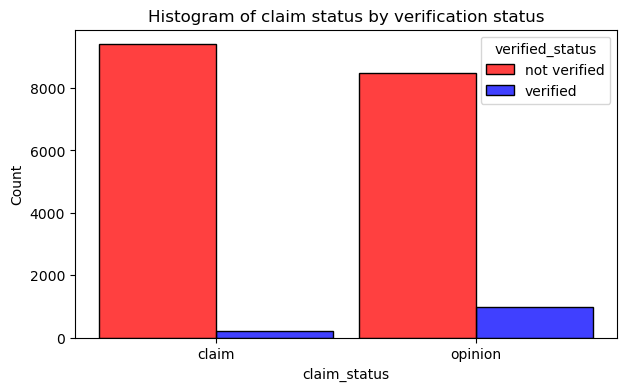

In [22]:
# Histogram of claim status by verification status.

color = ['red', 'blue']
plt.figure(figsize = (7,4))
sns.histplot(data = tiktok_df,
            x = 'claim_status',
            hue = 'verified_status',
            palette = color, 
            multiple='dodge',
            shrink = 0.9)
plt.title('Histogram of claim status by verification status');

#### The number of unverified users is much higher than the number of verified users. However, if a user is verified, they are much likely to post opinions rather than claims.

### Claim status by Author Ban Status

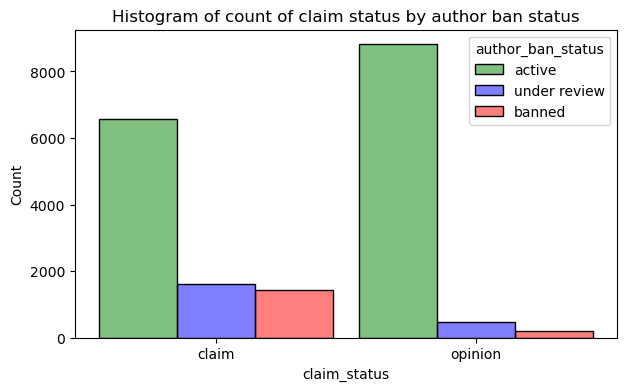

In [23]:
# Histogram of count of claim status by author ban status.

color = ['green', 'blue', 'red']
plt.figure(figsize = (7,4))
sns.histplot(data = tiktok_df,
            x = 'claim_status',
            hue = 'author_ban_status',
            multiple = 'dodge',
            hue_order = ['active', 'under review', 'banned'],
            shrink = 0.9,
            palette = color,
            alpha = 0.5
            )
plt.title('Histogram of count of claim status by author ban status');

#### For both claims and opinions, there are a lot more active authors than under review or banned authors. However, the proportion of active authors is much more for opinion videos than for claim videos. Also, it seems that authors who post claim videos are more likely to come under review and/or get banned.

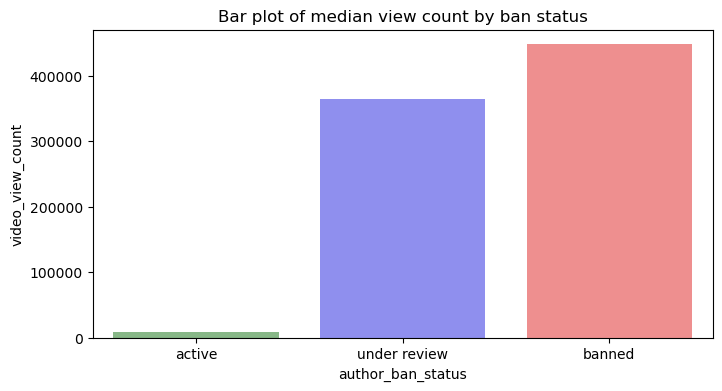

In [24]:
# Bar plot of median view count by ban status.

ban_count = tiktok_df.groupby(['author_ban_status']).median(numeric_only = True).reset_index()

color = ['green', 'blue', 'red']
plt.figure(figsize = (8,4))
sns.barplot(data = ban_count,
           x = 'author_ban_status',
           y = 'video_view_count',
           order = ['active', 'under review', 'banned'],
           palette = color,
           alpha = 0.5)
plt.title('Bar plot of median view count by ban status');

#### The median count of the authors who are under review and have been banned is drastically higher than that of the active authors. Also, we know that these non-active authors (authors who are under review or have been banned) are much likely to post claims rather than opinions.

In [25]:
# Calculating the median view count for claim status.
tiktok_df.groupby(['claim_status'])['video_view_count'].median()

claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

#### The total number of claims is significantly higher than those of opinions.

### Total views by claim status

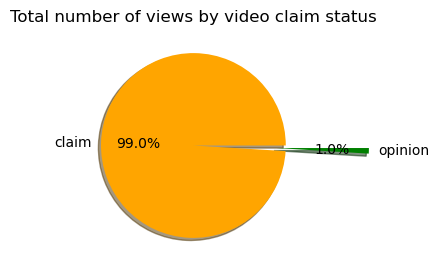

In [26]:
# Pie graph of the proportions of total views for claim videos and total views for opinion videos.
color = ['orange', 'green']
plt.figure(figsize = (3,3))
plt.pie(tiktok_df.groupby('claim_status')['video_view_count'].sum(), labels = ['claim', 'opinion'], colors = color,
        autopct = '%1.1f%%', shadow = True, explode = (0,0.9))
plt.title('Total number of views by video claim status');

#### Clearly, the view count is more dominated by claims than by opinions.

### Checking for Outliers

In [27]:
column_count = ['video_view_count', 'video_like_count', 'video_comment_count', 'video_share_count', 'video_download_count']

for i in column_count:
    Q1 = tiktok_df[i].quantile(0.25)
    Q3 = tiktok_df[i].quantile(0.75)
    
    iqr = Q3 - Q1
    median = tiktok_df[i].median()
    outlier_threshold = median + 1.5 * iqr
    
    outlier_count = (tiktok_df[i] > outlier_threshold).sum()
    print(f'Number of outliers in {i} column :', outlier_count)

Number of outliers in video_view_count column : 2343
Number of outliers in video_like_count column : 3468
Number of outliers in video_comment_count column : 3882
Number of outliers in video_share_count column : 3732
Number of outliers in video_download_count column : 3733


#### **Scatterplot**

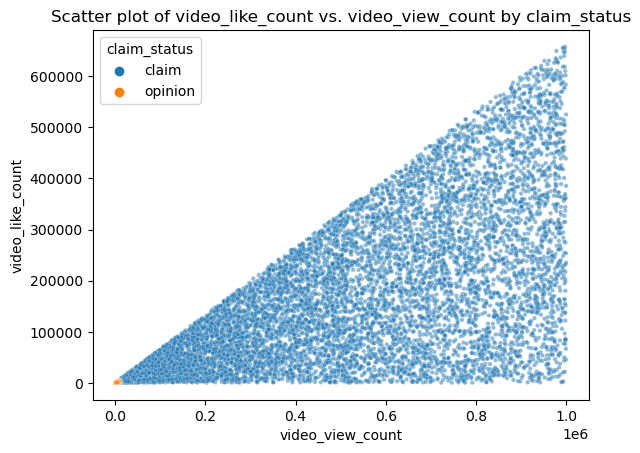

In [28]:
# Scatter plot of 'video_like_count' vs. 'video_view_count' by 'claim_status'.

sns.scatterplot(x = tiktok_df['video_view_count'],
               y = tiktok_df['video_like_count'],
               hue = tiktok_df['claim_status'],
               s = 10,
               alpha = 0.5)
plt.title('Scatter plot of video_like_count vs. video_view_count by claim_status');

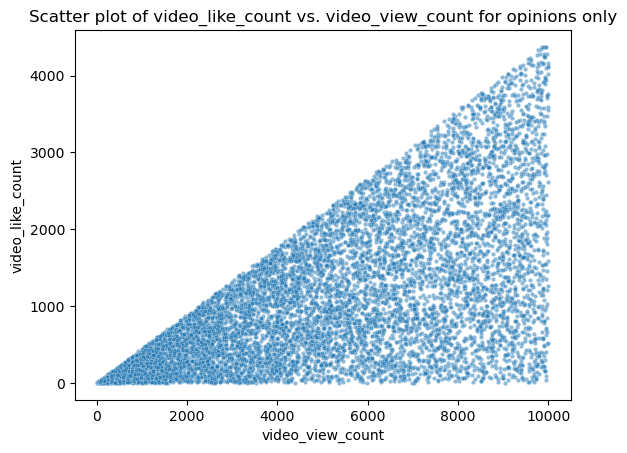

In [29]:
# Scatterplot of 'video_like_count' versus 'video_view_count' for opinions only.

opinion = tiktok_df[tiktok_df['claim_status'] == 'opinion']
sns.scatterplot(x = opinion['video_view_count'],
               y = opinion['video_like_count'],
               s = 10,
               alpha = 0.5)
plt.title('Scatter plot of video_like_count vs. video_view_count for opinions only');

#### Hypothesis Testing

I'm interested in the relationship between 'verified_status' and 'video_view_count'. One approach is to examine the mean values of 'video_view_count' for each group of 'verified_status' in the sample data.

In [30]:
# Compute the mean `video_view_count` for each group in `verified_status`

tiktok_df.groupby("verified_status")["video_view_count"].mean()

verified_status
not verified    265663.785339
verified         91439.164167
Name: video_view_count, dtype: float64

The goal is to conduct a two-sample t-test. The steps for conducting a hypothesis test:


1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis


**$H_0$(Null Hypothesis)**: There is no difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to chance or sampling variability).

**$H_A$(Alternative Hypothesis)**: There is a difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to an actual difference in the corresponding population means).

I have chosen 5% as the significance level for the two-sample t-test.

In [31]:
## Conducting a two-sample t-test to compare means.

# Saving each sample in a variable.

not_verified = tiktok_df[tiktok_df["verified_status"] == "not verified"]["video_view_count"]
verified = tiktok_df[tiktok_df["verified_status"] == "verified"]["video_view_count"]

# Implementing a t-test using the two samples.

stats.ttest_ind(a = not_verified, b = verified, equal_var = False)

Ttest_indResult(statistic=25.499441780633777, pvalue=2.6088823687177823e-120)

Since the p-value is extremely small (much smaller than the significance level of 5%), I reject the null hypothesis. I conclude that there is a statistically significant difference in the mean video view count between verified and unverified accounts on TikTok.